In [1]:
!pip install gdown --quiet
!pip install plotly --quiet
!pip install pyarrow --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import io
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import IPython.display as display
sns.set(style="whitegrid")
%matplotlib inline

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

In [6]:
import gdown

trader_file_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_file_id = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"


trader_url = f"https://drive.google.com/uc?export=download&id={trader_file_id}"
sentiment_url = f"https://drive.google.com/uc?export=download&id={sentiment_file_id}"

trader_path = "csv_files/hyperliquid_trades.csv"
sentiment_path = "csv_files/fear_greed_index.csv"

#Download if not exists
try:
    if not os.path.exists(trader_path):
        gdown.download(trader_url, trader_path, quiet=False)
    if not os.path.exists(sentiment_path):
        gdown.download(sentiment_url, sentiment_path, quiet=False)
    print("Files downloaded successfully!",os.listdir("csv_files"))
except Exception as e:
    print(f"Download failed: {e}")
    print("\nTo fix this issue:")
    print("1. Open the Google Drive links in your browser and verify access")
    print("2. Change file sharing permissions to 'Anyone with the link'")
    print("3. Or provide the CSV files directly in the csv_files/ folder")
    print(f"\nExpected files:")
    print(f"  - {trader_path}")
    print(f"  - {sentiment_path}")


Downloading...
From: https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: c:\Users\DELL\OneDrive\Desktop\portfolio\btcsentiment-trader-behavior\ds_Sujal_Pokale\csv_files\hyperliquid_trades.csv
100%|██████████| 47.5M/47.5M [00:05<00:00, 8.72MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: c:\Users\DELL\OneDrive\Desktop\portfolio\btcsentiment-trader-behavior\ds_Sujal_Pokale\csv_files\fear_greed_index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 300kB/s]

Files downloaded successfully! ['fear_greed_index.csv', 'hyperliquid_trades.csv']


In [7]:
def safe_read(path):
    try:
        return pd.read_csv(path,low_memory=False)
    except Exception as e:
        print("Initial read_csv failed:",e)
        
        return pd.read_csv(path,engine='python',low_memory=False)

trader = safe_read(trader_path)
sent = safe_read(sentiment_path)

print("Trader Data Shape:",trader.shape)
print("Sentiment Data Shape:",sent.shape)

display.display(trader.head())
display.display(sent.head())

Trader Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
df = trader.copy()

df.columns = [c.strip().lower().replace(" ","_").replace("-","_") for c in df.columns]

possible_time_col = ['time','timestamp','date','created_at']
for c in possible_time_col:
    if c in df.columns:
        df['time'] = pd.to_datetime(df[c],errors='coerce')
        break

for col in ['execution_price', 'size', 'closedpnl', 'leverage', 'start_position']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col],errors='coerce')

if 'side' in df.columns:
    df['side'] = df['side'].astype(str).str.lower().str.strip()
    
df = df.dropna(subset=['time']).reset_index(drop=True)
print("After preprocessing, data shape:",df.shape)
display.display(df.head())

After preprocessing, data shape: (211224, 17)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,time
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1970-01-01 00:28:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1970-01-01 00:28:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1970-01-01 00:28:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1970-01-01 00:28:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1970-01-01 00:28:50


In [9]:
from IPython.display import display

In [10]:
gs = sent.copy()
gs.columns = [c.strip().lower().replace(" ", "_").replace("-", "_") for c in gs.columns]

if 'date' in gs.columns:
    gs['date'] = pd.to_datetime(gs['date'], errors='coerce').dt.date

# keep consistent with rest of the notebook
if 'classification' in gs.columns:
    gs['classification'] = gs['classification'].astype(str).str.title().str.strip()

display(gs.head())
display(gs['classification'].value_counts(dropna=False))


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [11]:
df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
for col in ['execution_price', 'size_tokens', 'size_usd', 'closed_pnl', 'start_position']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [13]:
df['date'] = df['time'].dt.date
df['leverage'] = df['size_usd'] / (df['execution_price'] * df['size_tokens'])
agg_funcs = {
    'closed_pnl': ['sum', 'mean', 'median'],
    'size_tokens': ['sum', 'mean', 'median'],
    'execution_price': ['median'],
    'leverage': ['mean', 'median']
}

daily = df.groupby('date').agg(agg_funcs)
daily.columns = ['_'.join(col).strip() for col in daily.columns.values]
daily = daily.reset_index()

daily['trade_count'] = df.groupby('date').size().values
wins = df.groupby('date').apply(lambda x: (x['closed_pnl'] > 0).sum())
daily['wins'] = wins.values
daily['win_rate'] = daily['wins'] / daily['trade_count']
display(daily.head())

C:\Users\DELL\AppData\Local\Temp\ipykernel_8348\3426752000.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wins = df.groupby('date').apply(lambda x: (x['closed_pnl'] > 0).sum())


,date,closed_pnl_sum,closed_pnl_mean,closed_pnl_median,size_tokens_sum,size_tokens_mean,size_tokens_median,execution_price_median,leverage_mean,leverage_median,trade_count,wins,win_rate
0,1970-01-01,1.029696e+07,48.749001,0.0,9.765656e+08,4623.364979,32.0,18.28,0.99981,1.0,211224,86869,0.411265


In [14]:
daily['date'] = pd.to_datetime(daily['date']).dt.date
gs['date'] = pd.to_datetime(gs['date']).dt.date 

merged = pd.merge(daily,gs[['date','classification']], on='date', how='left')
print("Merged Data Shape:",merged.shape)
display(merged.head())

Merged Data Shape: (1, 14)


,date,closed_pnl_sum,closed_pnl_mean,closed_pnl_median,size_tokens_sum,size_tokens_mean,size_tokens_median,execution_price_median,leverage_mean,leverage_median,trade_count,wins,win_rate,classification
0,1970-01-01,1.029696e+07,48.749001,0.0,9.765656e+08,4623.364979,32.0,18.28,0.99981,1.0,211224,86869,0.411265,NaN


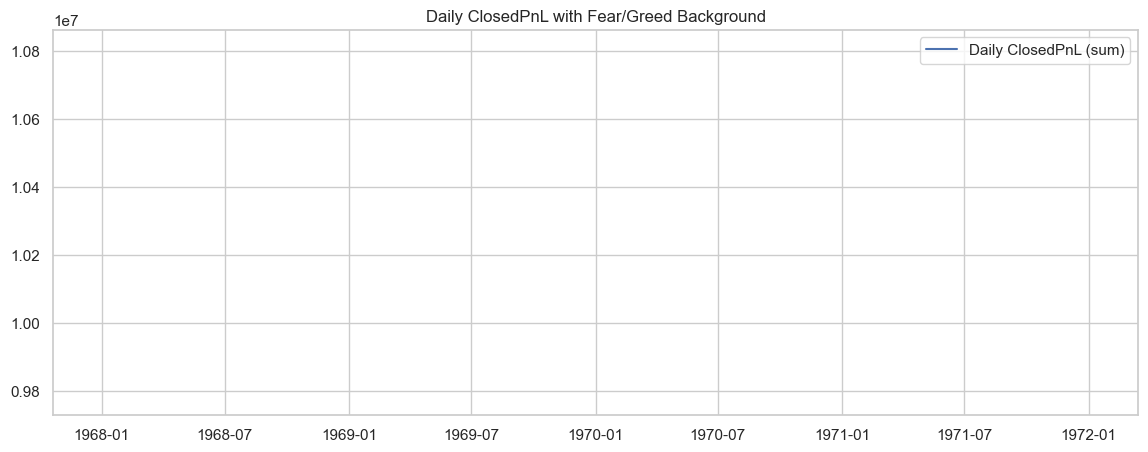

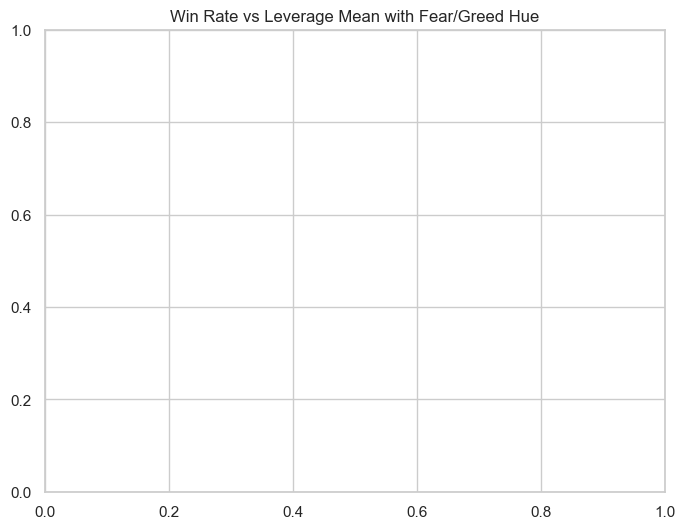

c:\Users\DELL\OneDrive\Desktop\portfolio\btcsentiment-trader-behavior\ds_Sujal_Pokale\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\DELL\OneDrive\Desktop\portfolio\btcsentiment-trader-behavior\ds_Sujal_Pokale\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


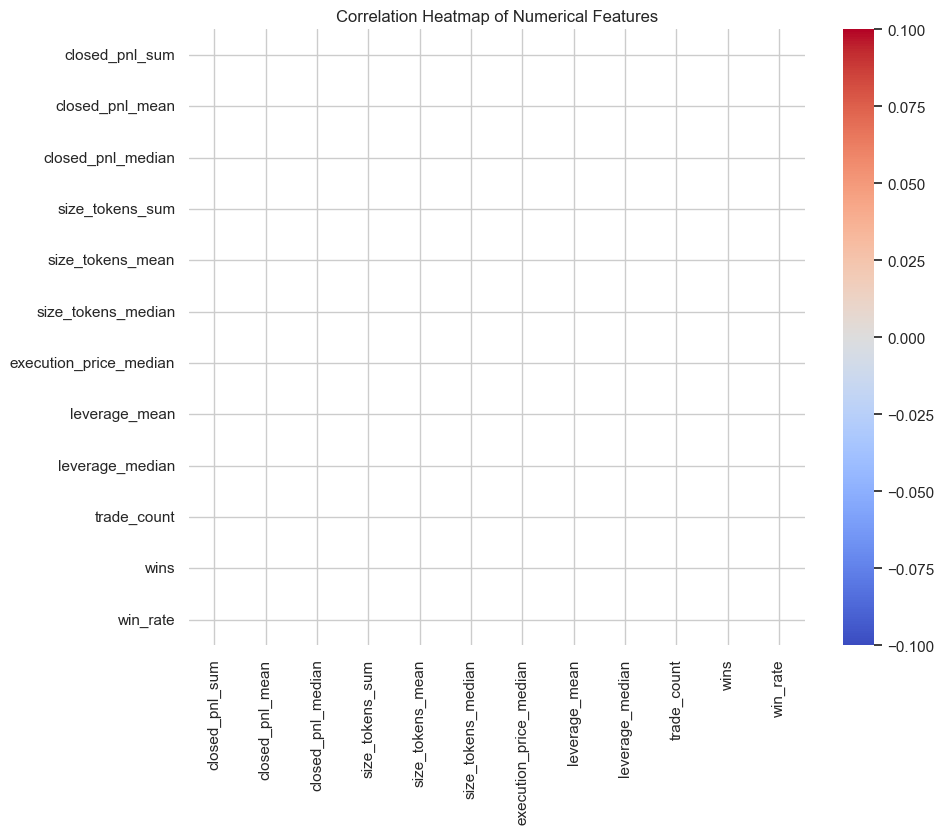

In [15]:
plt.figure(figsize=(14,5))
plt.plot(merged['date'], merged['closed_pnl_sum'], label = "Daily ClosedPnL (sum)")

for idx , row in merged.iterrows():
    if pd.isna(row['classification']):
        continue
    color = '#ffcccc' if row['classification']=='Fear' else '#ccffcc'
    plt.axvspan(pd.to_datetime(row['date']),pd.to_datetime(row['date'])+pd.Timedelta(days=1), color=color, alpha=0.2)

plt.legend()
plt.title("Daily ClosedPnL with Fear/Greed Background")
plt.savefig("outputs/daily_closedpnl_fear_greed.png",bbox_inches='tight')
plt.show()

#Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged,x="leverage_mean",y='win_rate',hue='classification')
plt.title("Win Rate vs Leverage Mean with Fear/Greed Hue")
plt.savefig("outputs/winrate_vs_leverage_fear_greed.png",bbox_inches='tight')
plt.show()

#correlation heatmap
num_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
corr = merged[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig("outputs/correlation_heatmap.png",bbox_inches='tight')
plt.show()

In [16]:
merged['sentiment_num'] = merged['classification'].map({'Fear':0,'Greed':1})
numeric_cols = merged.select_dtypes(include=[np.number])
print(numeric_cols.isna().sum())


same_day_corr = merged[['sentiment_num','closed_pnl_sum','trade_count','leverage_mean','win_rate']].corr()['sentiment_num']
print("Same Day Correlation with Sentiment:")
print(same_day_corr)

for lag in [1,2,3,5,7]:
     merged[f'sentiment_lag_{lag}'] = merged['sentiment_num'].shift(lag)
     
for lag in [1,2,3,5,7]:
    print(f"\nCorrelation with sentiment lag {lag} (sentiment_{lag} -> metrics):")
    print(merged[[f'sentiment_lag_{lag}','closed_pnl_sum','trade_count','leverage_mean','win_rate']].corr().loc[f'sentiment_lag_{lag}'])

daily = daily.apply(pd.to_numeric, errors='coerce')


closed_pnl_sum            0
closed_pnl_mean           0
closed_pnl_median         0
size_tokens_sum           0
size_tokens_mean          0
size_tokens_median        0
execution_price_median    0
leverage_mean             0
leverage_median           0
trade_count               0
wins                      0
win_rate                  0
sentiment_num             1
dtype: int64
Same Day Correlation with Sentiment:
sentiment_num    NaN
closed_pnl_sum   NaN
trade_count      NaN
leverage_mean    NaN
win_rate         NaN
Name: sentiment_num, dtype: float64

Correlation with sentiment lag 1 (sentiment_1 -> metrics):
sentiment_lag_1   NaN
closed_pnl_sum    NaN
trade_count       NaN
leverage_mean     NaN
win_rate          NaN
Name: sentiment_lag_1, dtype: float64

Correlation with sentiment lag 2 (sentiment_2 -> metrics):
sentiment_lag_2   NaN
closed_pnl_sum    NaN
trade_count       NaN
leverage_mean     NaN
win_rate          NaN
Name: sentiment_lag_2, dtype: float64

Correlation with sentiment l

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score

model_df = merged.copy().sort_values('date')

# Try to ensure sentiment_num exists by mapping classification if needed
if 'sentiment_num' not in model_df.columns or model_df['sentiment_num'].isna().all():
	if 'classification' in model_df.columns:
		model_df['sentiment_num'] = model_df['classification'].map({'Fear': 0, 'Greed': 1})

model_df['next_sent'] = model_df['sentiment_num'].shift(-1)

# drop rows where target is missing
model_df = model_df.dropna(subset=['next_sent']).reset_index(drop=True)

# Guard against empty / too-small datasets for train_test_split
if model_df.empty or len(model_df) < 2:
	print("Not enough data to train/test a model. "
		  f"Rows available after preprocessing: {len(model_df)}. "
		  "Need at least 2 rows (train + test).")
else:
	features = ['closed_pnl_sum','trade_count','leverage_mean','win_rate']
	x = model_df[features].fillna(0)
	y = model_df['next_sent'].astype(int)

	try:
		X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)
		if len(X_train) == 0 or len(X_test) == 0:
			print("Train or test set is empty after split. "
				  f"Total rows: {len(x)}, train: {len(X_train)}, test: {len(X_test)}. "
				  "Consider reducing test_size or providing more data.")
		else:
			clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
			y_pred = clf.predict(X_test)
			print("Classification Report:\n", classification_report(y_test, y_pred))
			print("ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
	except ValueError as e:
		print("Model training / splitting failed:", e)
		print("Rows available:", len(x))


Not enough data to train/test a model. Rows available after preprocessing: 0. Need at least 2 rows (train + test).


In [20]:
merged.to_csv("csv_files/daily_merged_metrics.csv", index=False)
df.to_csv("csv_files/trades_cleaned_sample.csv", index=False)  # large files: you may want entire, or sampled
print("Saved processed CSVs to csv_files/")


Saved processed CSVs to csv_files/
